<a href="https://colab.research.google.com/github/karlychann/cs50-final/blob/main/uvfp_testrf_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final models trained on the entire dataset, with and without biased features

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from io import BytesIO
import pickle
import requests
pd.set_option('display.max_columns', None)

In [ ]:
all_features = ['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']


# from classification_wo_correlated_features.ipynb features that correlate least with biased features
uncorrelated_features = ['mfcc4V_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'mfcc1_sma3_amean',
       'F3bandwidth_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F1frequency_sma3nz_stddevNorm', 'jitterLocal_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
       'alphaRatioV_sma3nz_stddevNorm', 'mfcc1_sma3_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'mfcc4_sma3_amean',
       'F3frequency_sma3nz_amean', 'mfcc2_sma3_amean',
       'VoicedSegmentsPerSec', 'F1bandwidth_sma3nz_amean',
       'mfcc2V_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm',
       'hammarbergIndexV_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_amean', 'slopeV500-1500_sma3nz_stddevNorm',
       'F2bandwidth_sma3nz_amean', 'mfcc3_sma3_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'mfcc2_sma3_stddevNorm', 'mfcc1V_sma3nz_amean',
       'slopeUV0-500_sma3nz_amean', 'mfcc1V_sma3nz_stddevNorm',
       'mfcc3V_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'mfcc3_sma3_stddevNorm',
       'mfcc2V_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'mfcc4V_sma3nz_stddevNorm',
       'mfcc4_sma3_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_stddevNorm']

In [ ]:
# load pretrained model
# model_name = 'less-biased'
# training_model_name = 'rf'
# task = 'speech'
# feature_set = uncorrelated_features

# url_path = f'https://github.com/danielmlow/vfp/blob/main/data/output/{training_model_name}_{model_name}_{task}.pkl?raw=true' # speech models trained on reading task
# mfile = BytesIO(requests.get(url_path).content) # load from url
# model = pickle.load(mfile)

# Extract features on your own wav files using egemaps


To test on your own data, the test set should match our features (egemaps) using the the same variables and sampling rate (16k)

In [ ]:
# from os.path import exists
# # config: depends whether you're on Google Colab or local


# # Get URL from github csv by clicking on Download > Copy Link Address

# load_from_google_drive = False

# if load_from_google_drive:
#       # On google colab
#       # Mount GDrive and attach it to the colab for data I/O
#     from google.colab import drive
#     drive.mount('/content/drive')
#     input_dir = '/content/drive/My Drive/datum/vfp/data/input/'
#     output_dir = '/content/drive/My Drive/datum/vfp/data/output/'
#     os.makedirs(output_dir, exist_ok=True)

# else:
#   # If using jupyter-lab or jupyter notebook, load locally:
#   input_dir = './data/input/'
#   output_dir = './data/output/'



In [ ]:
from google.colab import drive
drive.flush_and_unmount()

from google.colab import drive
drive.mount('/content/drive')
input_dir = '/content/drive/My Drive/neuro140/vfp/data/input/'
output_dir = '/content/drive/My Drive/neuro140/vfp/data/output/'
os.makedirs(output_dir, exist_ok=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/neuro140/vfp/data/archive.zip -d /content/drive/MyDrive/neuro140/vfp/data

In [ ]:
! grep 'Vocal fold paralysis' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice087-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice093-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice112-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice136-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice170-info.txt:Diagnosis:	hyperkinetic dysphonia (Vocal fold paralysis)


In [ ]:
# ! grep 'healthy' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt | head

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice002-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice019-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice024-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice025-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice032-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice034-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice040-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice045-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice049-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice051-info.txt:Diagnosis:	healthy


In [ ]:
#pip install wfdb scipy

In [ ]:
# ! rm /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice001.wav


In [ ]:
# !pip install -q opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import glob
# import opensmile

In [ ]:
# wav_dir = '/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.wav'
# wav_paths = glob.glob(wav_dir)

In [ ]:
# smile = opensmile.Smile(
#             feature_set=opensmile.FeatureSet.eGeMAPSv02, #or path to conf: 'gemaps/eGeMAPSv02.conf'
#             feature_level=opensmile.FeatureLevel.Functionals,
#             sampling_rate=16000,
#             resample=True,
#             # num_workers = 4,
#             verbose=True,
#         )
# feature_vectors = smile.process_files(wav_paths)
# df_voiced = feature_vectors.reset_index()


In [ ]:
! find '/content/drive/MyDrive/neuro140/vfp/data/' -name '*.csv**'

/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv


In [ ]:
df_voiced = pd.read_csv('/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv')


# Training these models

In [ ]:
# We choose Random Forest as it tends to have highest median classification across analyses
# model = RandomForestClassifier(n_estimators= 100)

# Others:
# LogisticRegressionCV(solver='liblinear', penalty = 'l1', max_iter = 100)
# MLPClassifier(alpha = 1, max_iter= 1000)
# SGDClassifier(loss='log', penalty="elasticnet", early_stopping=True, max_iter = 5000)

# Random Forest Model (without hyperparameter tuning)



In [ ]:
training_model_name = 'rf'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import pickle

random_seed = 38


for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)

    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):

        X = df[feature_set].values
        y = df['target'].values

        model = RandomForestClassifier(n_estimators=100, random_state=random_seed)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

        print(f'5-Fold CV ROC AUC Scores for {task} - {model_name} - {training_model_name}:', cv_scores)
        print(f'Mean CV ROC AUC for {task} - {model_name} - {training_model_name} :', cv_scores.mean())

        model.fit(X, y)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(model, f)

        # with open(output_path, 'rb') as f:
        #     model = pickle.load(f)

        print(f'Completed training and saving for {task} - {model_name} - {training_model_name}with mean CV ROC AUC: {cv_scores.mean()}')

5-Fold CV ROC AUC Scores for speech - biased - rf: [0.97178538 0.95027752 0.93587963 0.97021277 0.95531915]
Mean CV ROC AUC for speech - biased - rf : 0.9566948898482203
Completed training and saving for speech - biased - rfwith mean CV ROC AUC: 0.9566948898482203
5-Fold CV ROC AUC Scores for speech - less-biased - rf: [0.94449584 0.89569843 0.88148148 0.92813239 0.94444444]
Mean CV ROC AUC for speech - less-biased - rf : 0.9188505156405249
Completed training and saving for speech - less-biased - rfwith mean CV ROC AUC: 0.9188505156405249
5-Fold CV ROC AUC Scores for vowel - biased - rf: [0.99227053 0.95821256 0.97294686 0.95797101 0.94801741]
Mean CV ROC AUC for vowel - biased - rf : 0.9658836748614732
Completed training and saving for vowel - biased - rfwith mean CV ROC AUC: 0.9658836748614732
5-Fold CV ROC AUC Scores for vowel - less-biased - rf: [0.97294686 0.93743961 0.93719807 0.92826087 0.91658607]
Mean CV ROC AUC for vowel - less-biased - rf : 0.9384862968257973
Completed train

# RF Model With Hyperparameter Tuned Settings

In [ ]:
training_model_name = 'rf'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle

random_seed = 42

# Hyperparameter tuned settings
new_param_grids = {
    ('speech', 'biased') : {
      'n_estimators': [300],
      'max_depth': [None],
      'min_samples_split': [5],
      'min_samples_leaf': [2],
      'max_features': ['auto'],
      'bootstrap': [False]
    },
    ('speech', 'less-biased') : {
      'n_estimators': [200],
      'max_depth': [None],
      'min_samples_split': [2],
      'min_samples_leaf': [2],
      'max_features': ['sqrt'],
      'bootstrap': [True]
    },
    ('vowel', 'biased') : {
      'n_estimators': [100],
      'max_depth': [10],
      'min_samples_split': [2],
      'min_samples_leaf': [1],
      'max_features': ['auto'],
      'bootstrap': [True]
    },
    ('vowel', 'less-biased') : {
      'n_estimators': [200],
      'max_depth': [30],
      'min_samples_split': [2],
      'min_samples_leaf': [1],
      'max_features': ['sqrt'],
      'bootstrap': [False]
    },
}


cv = StratifiedKFold(n_splits=5)

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        model = RandomForestClassifier(n_estimators=100, random_state=random_seed)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

        param_grid = new_param_grids[(task, model_name)]
        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertunedparameters2.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(grid_search.best_params_, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for speech - biased: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best CV score for speech - biased: 0.9611396340836673
Model saved for speech - biased with parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for speech - less-biased: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score for speech - less-biased: 0.9159560763353547
Model saved for speech - less-biased with parameters {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for vowel - biased: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score for vowel - biased: 0.961635597417281
Model saved for vowel - biased with parameters {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for vowel - less-biased: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score for vowel - less-biased: 0.9436122557676674
Model saved for vowel - less-biased with parameters {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Hyperparameter grid

In [ ]:
training_model_name = 'rf'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import pickle

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

cv = StratifiedKFold(n_splits=5)

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        model = RandomForestClassifier(n_estimators=100)

        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertunedparameters.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(grid_search.best_params_, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for speech - biased: {'max_depth': None, 'n_estimators': 300}
Best CV score for speech - biased: 0.9171721999520335
Model saved for speech - biased with parameters {'max_depth': None, 'n_estimators': 300}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for speech - less-biased: {'max_depth': None, 'n_estimators': 200}
Best CV score for speech - less-biased: 0.8841670521122419
Model saved for speech - less-biased with parameters {'max_depth': None, 'n_estimators': 200}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for vowel - biased: {'max_depth': 10, 'n_estimators': 100}
Best CV score for vowel - biased: 0.925300086900457
Model saved for vowel - biased with parameters {'max_depth': 10, 'n_estimators': 100}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for vowel - less-biased: {'max_depth': 30, 'n_estimators': 200}
Best C

# Permutation feature importance

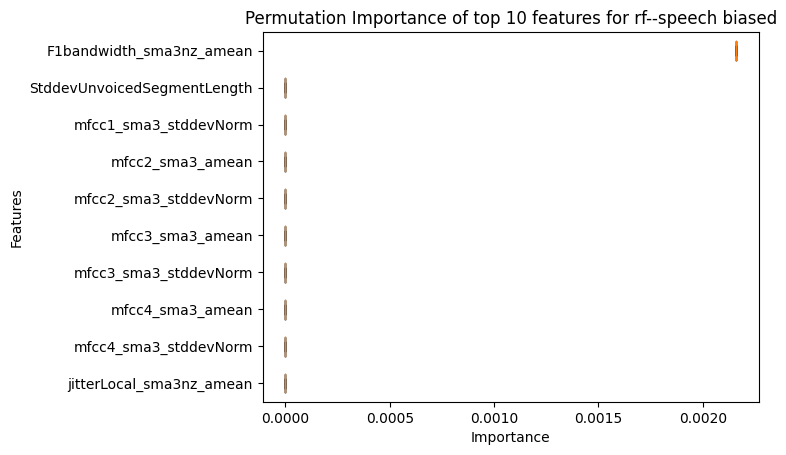

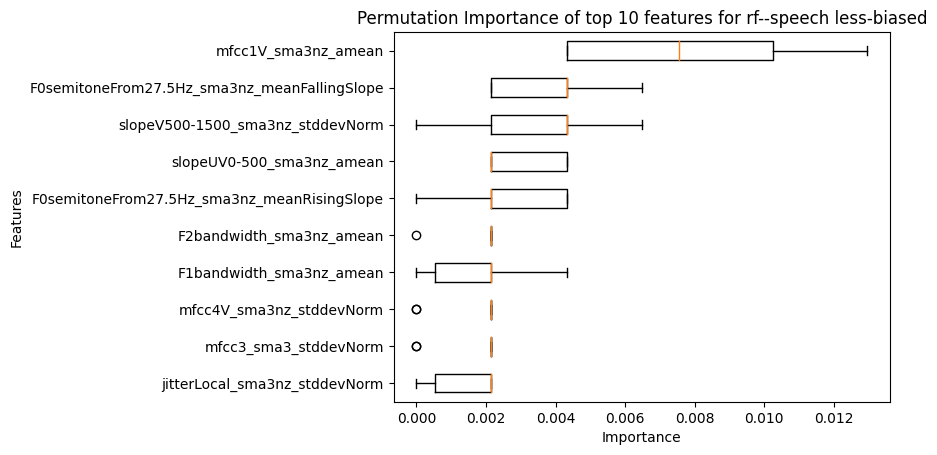

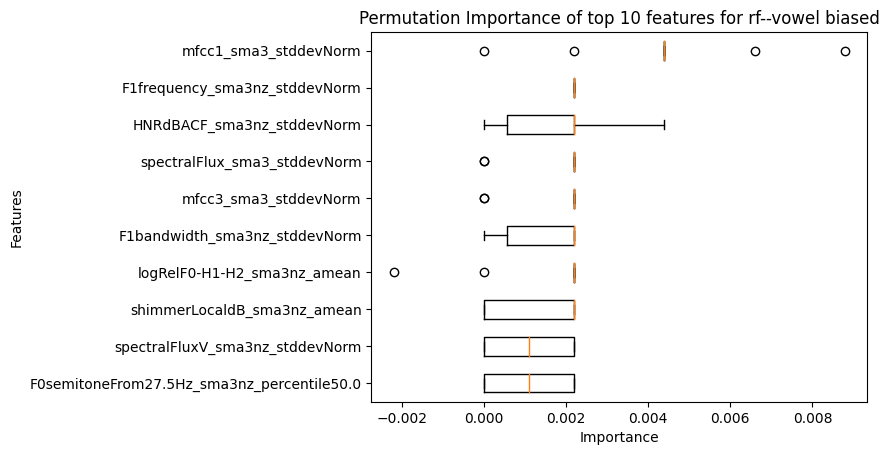

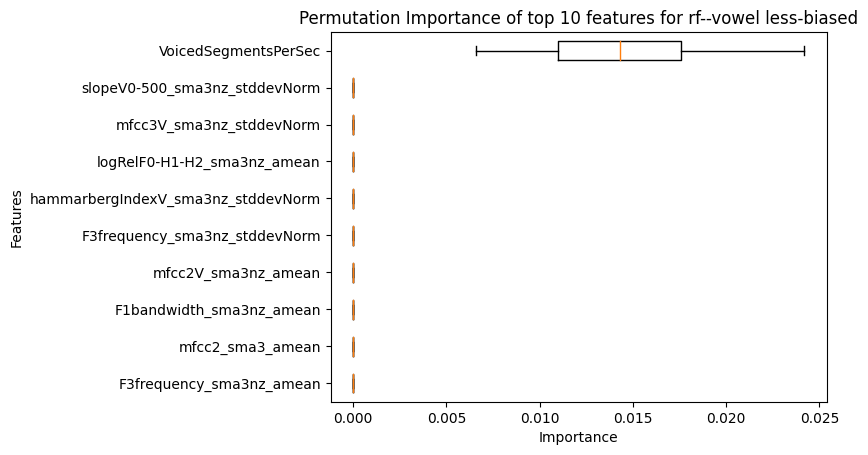

In [ ]:
training_model_name = 'rf'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

results = []

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        input_file = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(input_file, 'rb') as f:
            best_model = pickle.load(f)

        result = permutation_importance(best_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)

        sorted_idx = result.importances_mean.argsort()
        sorted_results = result.importances[sorted_idx]
        sorted_results = sorted_results[-10:]
        results.append(sorted_results)

        fig, ax = plt.subplots()
        ax.boxplot(sorted_results.T,
                  vert=False, labels=np.array(feature_set)[sorted_idx][-10:])
        ax.set_title(f"Permutation Importance of top 10 features for {training_model_name}--{task} {model_name}")
        ax.set_ylabel("Features")
        ax.set_xlabel("Importance")
        plt.show()

# Other features

In [ ]:
cpp_features = ['cpp_amean', 'cpp_stddevNorm', 'cpp_percentile20', 'cpp_percentile80']